# Time Series - Multivariate example

###### Links: [Walmart dataset (Kaggle)](https://www.kaggle.com/c/m5-forecasting-uncertainty/overview)  |  [Article ()]()

### 0 - Setup

###### Import pckgs 

In [31]:
import warnings
warnings.filterwarnings("ignore")
from ts_utils import *
import datetime

###### Import data

In [43]:
dtf = pd.read_csv('data_multiple.csv')
dtf.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536_CA_1_validation,FOODS_3_536,FOODS_3,FOODS,CA_1,CA,3,2,2,4,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382_CA_3_validation,FOODS_3_382,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375_WI_1_validation,HOUSEHOLD_1_375,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,1,0,0,1,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084_CA_3_validation,FOODS_2_084,FOODS_2,FOODS,CA_3,CA,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668_CA_1_validation,FOODS_3_668,FOODS_3,FOODS,CA_1,CA,22,9,7,12,...,10,10,8,8,9,10,6,6,10,6


In [44]:
# Create dates list
cols = dtf.filter(like="d_", axis=1).columns.tolist()
dates = pd.date_range(start=(datetime.datetime.now() - datetime.timedelta(days=len(cols)-1)).strftime("%Y-%m-%d"),
                      end=datetime.datetime.now().strftime("%Y-%m-%d"), 
                      freq='D').astype(str).tolist()
print(dates[0:5], "...", dates[-1])

['2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-02'] ... 2021-06-23


In [45]:
# Summarize ts
dtf = dtf.drop_duplicates("item_id", keep='first').reset_index(drop=True)
dtf = dtf.drop(["id","dept_id","state_id","store_id"], axis=1)
dtf.columns = ["ts","exog"] + dates
dtf, dates = resample_multiple_ts(dtf, dates, rule="M", agg="sum")
dtf.head()

--- columns from: 1915 --> to: 66 ---


,ts,exog,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_3_536,FOODS,7,43,57,43,60,24,37,51,...,19,42,49,36,40,26,41,32,28,36
1,FOODS_3_382,FOODS,0,0,0,0,0,0,0,0,...,60,41,18,10,12,10,39,61,867,10
2,HOUSEHOLD_1_375,HOUSEHOLD,1,33,35,22,21,26,29,24,...,6,15,15,22,14,8,23,21,12,16
3,FOODS_2_084,FOODS,0,0,0,0,0,0,0,0,...,63,56,51,46,53,12,35,34,45,47
4,FOODS_3_668,FOODS,38,477,524,512,472,391,325,391,...,346,336,279,255,233,265,196,187,216,179


In [46]:
# Extract means
dtf = summarize_multiple_ts(dtf, by="exog", aggs=["mean"], return_all=False)
dtf

--- rows from: 3005 --> to: 3 ---


,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_mean,4.204947,37.342049,35.409894,33.742756,33.215548,36.804947,36.201413,40.125088,39.691873,...,54.681979,54.870671,53.778799,54.618375,50.746290,44.216961,54.810601,55.398587,58.460071,44.386572
1,HOBBIES_mean,1.575045,12.694394,12.674503,12.092224,13.602170,14.580470,13.106691,13.455696,14.419530,...,18.714286,19.641953,18.537071,20.121157,19.070524,18.048825,18.640145,18.576854,18.757685,14.464738
2,HOUSEHOLD_mean,1.507232,12.992285,13.785921,13.888139,13.195757,14.439730,14.662488,14.759884,15.432980,...,26.687560,29.018322,27.313404,27.302797,25.594021,23.223722,26.958534,28.849566,28.087753,22.615236


### 1 - Analysis

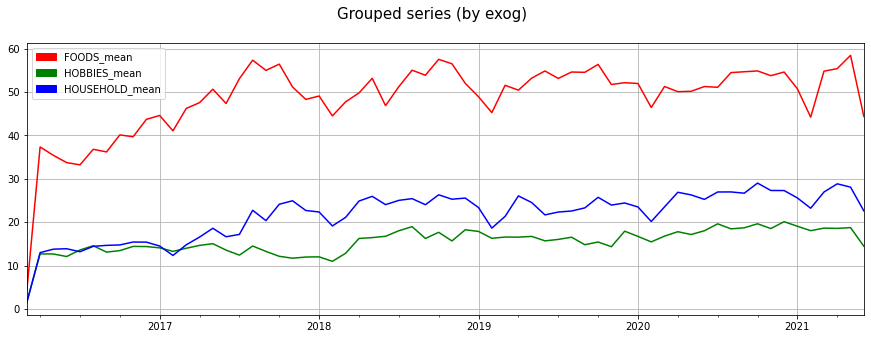

In [47]:
# Plot
plot_multiple_ts(dtf, dates, color="ts", lst_colors=["red","green","blue"], legend=True, 
                 title="Grouped series (by exog)", figsize=(15,5))

### 2 - Preprocessing

###### Partitioning

In [48]:
# By Columns
dtf_train, dtf_test = split_multiple_train_test(dtf, idxs=dates, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

--- splliting at 2020-06-30 (0.8) ---
train: (3, 52) | test: (3, 14)


In [49]:
dtf_test.head()

,ts,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_mean,51.275618,51.096820,54.479859,54.681979,54.870671,53.778799,54.618375,50.746290,44.216961,54.810601,55.398587,58.460071,44.386572
1,HOBBIES_mean,18.034358,19.625678,18.468354,18.714286,19.641953,18.537071,20.121157,19.070524,18.048825,18.640145,18.576854,18.757685,14.464738
2,HOUSEHOLD_mean,25.265188,26.966249,26.980714,26.687560,29.018322,27.313404,27.302797,25.594021,23.223722,26.958534,28.849566,28.087753,22.615236


### 3 - Forecasting

In [51]:
ts = utils_filter_ts(dtf_train, "FOODS_mean", idxs=None)
ts

,FOODS_mean
2016-03-31,4.204947
2016-04-30,37.342049
2016-05-31,35.409894
2016-06-30,33.742756
2016-07-31,33.215548
2016-08-31,36.804947
2016-09-30,36.201413
2016-10-31,40.125088
2016-11-30,39.691873
2016-12-31,43.713781


###### Arima

In [54]:
from kats.models.sarima import SARIMAModel, SARIMAParams
warnings.simplefilter(action='ignore')

# create SARIMA param class
params = SARIMAParams(p=2, d=1, q=1, trend='ct', seasonal_order=(1,0,1,12))

# initiate SARIMA model
m = SARIMAModel(data=ts, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(steps=30, freq="MS")

# make plot to visualize
m.plot()

SyntaxError: future feature annotations is not defined (consts.py, line 20)

In [55]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

# plot to visualize
m.plot()


SyntaxError: future feature annotations is not defined (consts.py, line 20)

In [57]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=ts, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()

SyntaxError: future feature annotations is not defined (consts.py, line 20)

In [58]:
from kats.models.var import VARModel, VARParams

params = VARParams()
m = VARModel(multi_ts, params)
m.fit()
fcst = m.predict(steps=90)

m.plot()
plt.show()

SyntaxError: future feature annotations is not defined (consts.py, line 20)